#**Reducción de dimensionalidad I**

A la hora de introducir datos en un algoritmo de ML pueden presentarse tres situaciones:
1. En primer lugar y la más clara sería introducir los datos una vez procesados sin reducir su dimensionalidad. Este método es apto para aquellos casos en que se tienen pocas columnas.
2. Reducir la dimensionalidad sin modificar los datos de entrada. Es decir, eliminar variables que no nos interesan
3. Reducir la dimensionalidad modificando el espacio vectorial.

# Mismo espacio vectorial -> Feature reducction

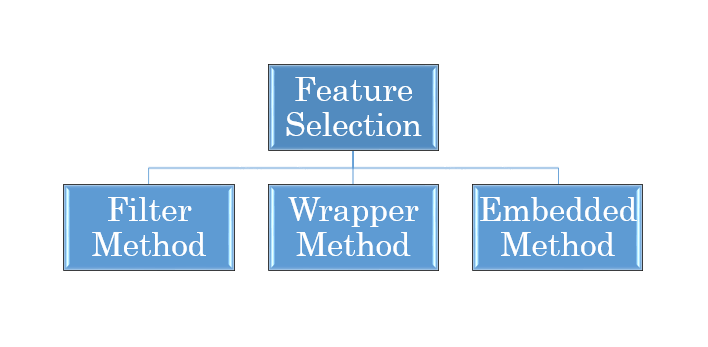
[1]

**Dataset**

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

*   CRIM - per capita crime rate by town
*   ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
*   INDUS - proportion of non-retail business acres per town.
*   CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
*   NOX - nitric oxides concentration (parts per 10 million)
*   RM - average number of rooms per dwelling
*   AGE - proportion of owner-occupied units built prior to 1940
*   DIS - weighted distances to five Boston employment centres
*   RAD - index of accessibility to radial highways
*   TAX - full-value property-tax rate per $10,000
*   PTRATIO - pupil-teacher ratio by town
*   B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

*   LSTAT - % lower status of the population
*   MEDV - Median value of owner-occupied homes in $1000's

In [10]:
import pandas as pd
import numpy as np

In [22]:
df = pd.read_csv("Housing.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [24]:
#Lo separamos en un dataset los datos y en el otro el target
X = df.drop("MEDV",1)
y = df["MEDV"]
X.head()

<ipython-input-24-a0d03043a9c8>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop("MEDV",1)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


## Método del filtrado

* Correlación
* Prueba χ² (Chi-squared test)
* ANOVA
* Factor de inflación de la varianza (VIF)

###Método de correlación

Se aplica a vairables numéricas. Hay dos tipos de correlación (que se tratan aquí):
1. Pearson: cuando dos variables tienen una relación lineal entre ellas.
2. Spearman: cuando dos variables tienen una relación monótona entre ellas.

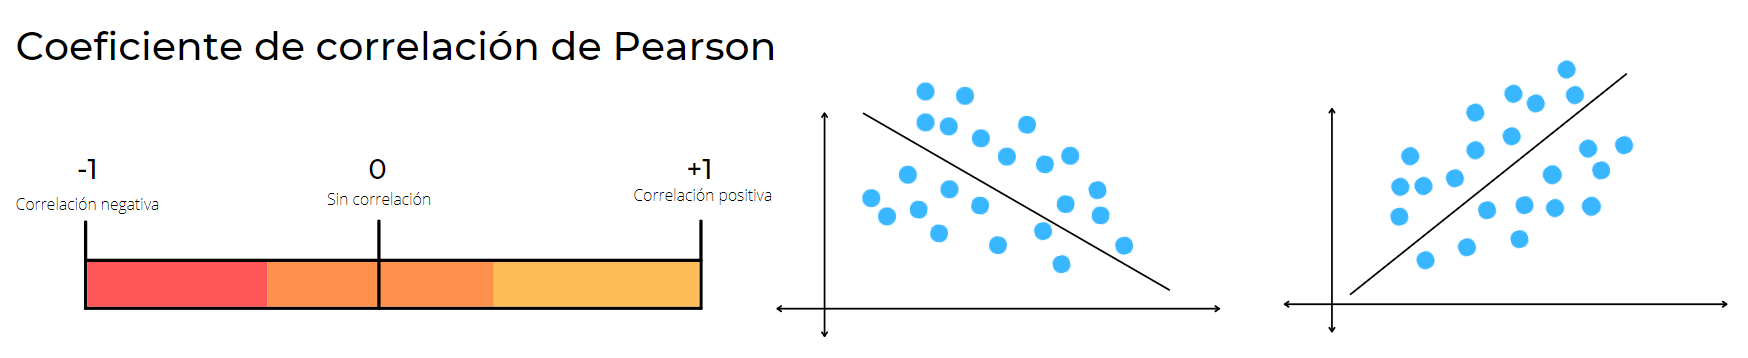

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

cor = df.corr() # Por defecto calculamos el de Pearson, para calcular Spearman -> df.corr(method='spearman')
cor

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Figure size 1200x1000 with 0 Axes>

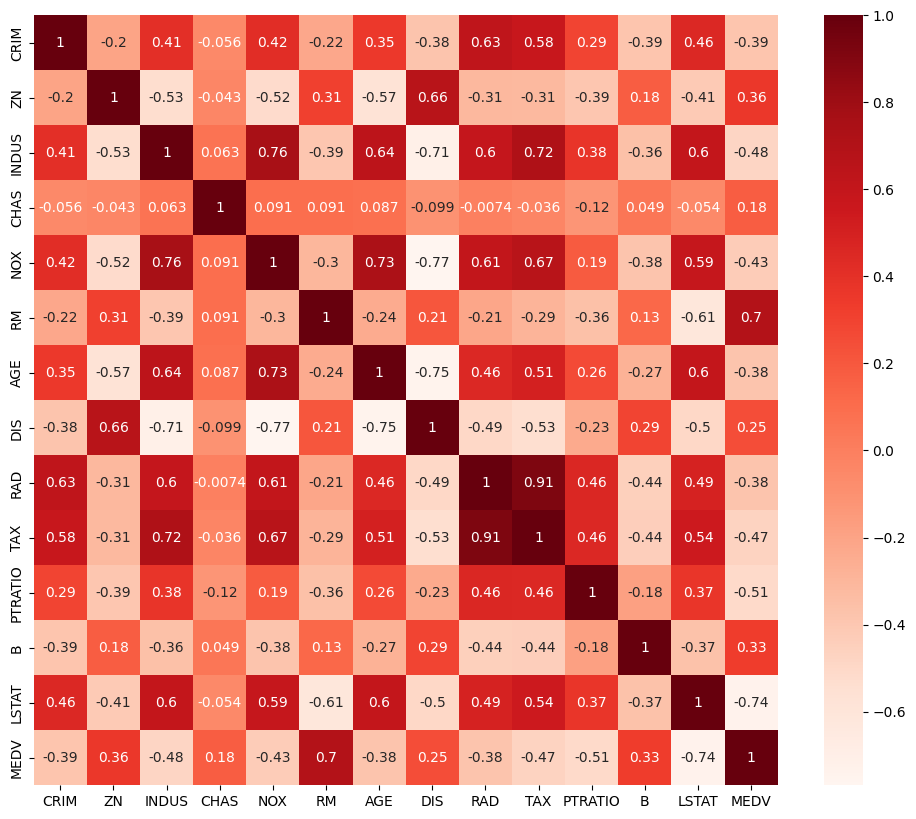

In [28]:
plt.figure(figsize=(12,10))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [25]:
# Correlación con la variable target
cor_target = abs(cor["MEDV"])
# ¿Cuales son aquellas variables que más correlacionadas están?
relevant_features = cor_target[cor_target>0.5]
relevant_features

RM         0.695360
PTRATIO    0.507787
LSTAT      0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

Una de las premisas para la regresion lineal es el hecho de que las variables que usemos no han de estar correlacionadas entre ellas. Necesitamos que no esten correlacionadas porque si lo estubieran serian dependientes y en ese caso nos sobraria una de ellas

Es decir hemos de hacer los mismo que en el paso anterior pero en este caso comprovar que no suceda entre ellas. Decimos que dos variables empiezan a estar correlacionadas si superan el umbral de 0.5 ( sin importar el signo) por lo tanto en este caso decimos que la correlacion entre RM y LSTAT es alta con la cual cosa debemos de deshacernos de una de las dos.

¿Con cual nos quedamos y cual eliminamos?

Básicamente nos decantamos por aquella que tenga mayor correlación con la variable que queremos predecir.

In [20]:
print(df[["LSTAT","PTRATIO"]].corr())
print()
print(df[["RM","LSTAT"]].corr())
print()
print(df[["PTRATIO","RM"]].corr())

            LSTAT   PTRATIO
LSTAT    1.000000  0.374044
PTRATIO  0.374044  1.000000

             RM     LSTAT
RM     1.000000 -0.613808
LSTAT -0.613808  1.000000

          PTRATIO        RM
PTRATIO  1.000000 -0.355501
RM      -0.355501  1.000000


In [27]:
fuera=X.columns
fuera=fuera.drop(["PTRATIO","LSTAT"])
X_1=X.drop(fuera,axis=1)
X_1

,PTRATIO,LSTAT
0,15.3,4.98
1,17.8,9.14
2,17.8,4.03
3,18.7,2.94
4,18.7,5.33
...,...,...
501,21.0,9.67
502,21.0,9.08
503,21.0,5.64
504,21.0,6.48


Función monótona. [2]

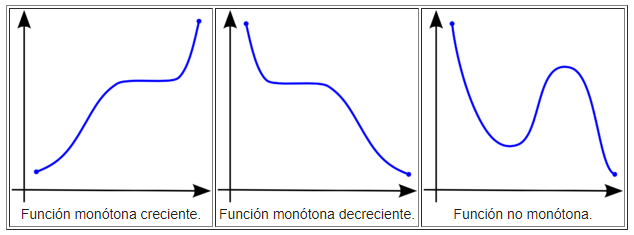

##Wrapper method
 [3]

 Más métodos: https://heartbeat.fritz.ai/hands-on-with-feature-selection-techniques-wrapper-methods-5bb6d99b1274

Este método consiste en aplicar un algoritmo de ML e iterar haciendo todas las combianciones de variables posibles (entre ellas y en número) para finalmente quedarse con aquella combinación que de mejor resultado en las métricas.

### Backward elimination

El concepto se basa en poner todas las variables para entrenar un modelo, una vez se ha entrenado se miran aquellas que tengan un p_valor > 0.05 y se elimina la que su valor sea máximo. Se va iterando hasta que se obtienen variables inferiores a 0.05.

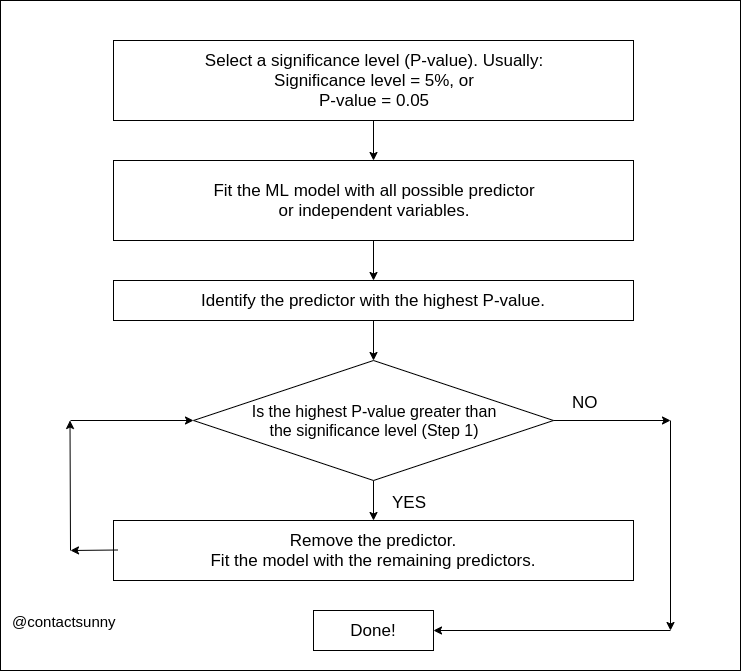
[4]

Este método contrasta con el **forward elimination** en el cual en lugar de poner todas las variables de inicio se ponen de una en una eligiendo la que menor p_valor tenga primero y posteriormente la combinación de esta y otra que tengan los p_valores menores...

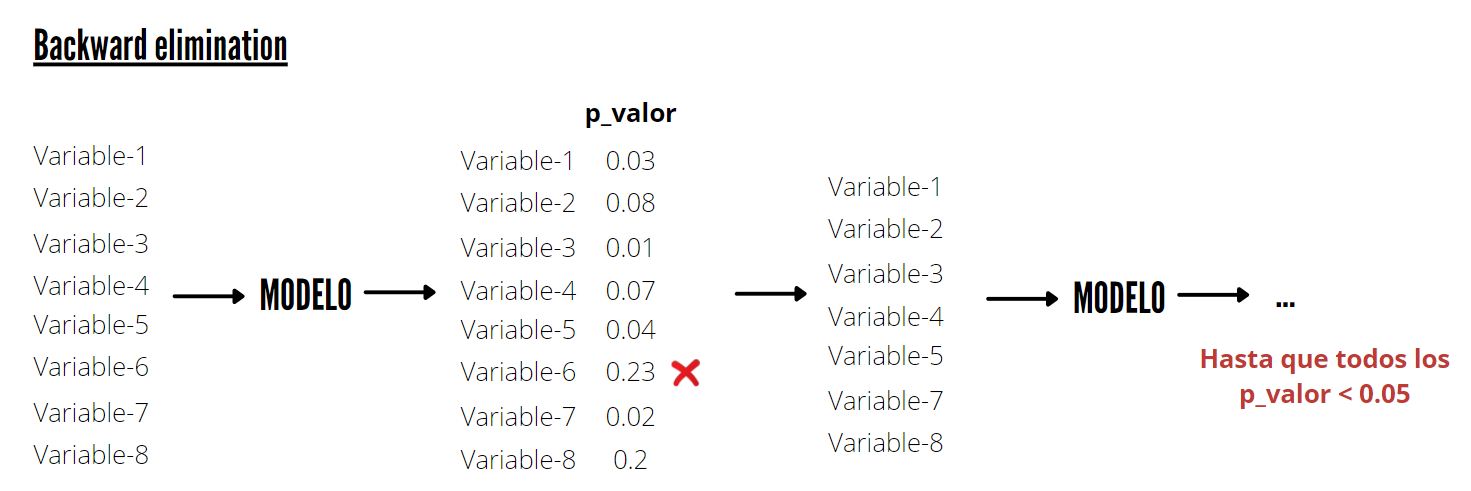

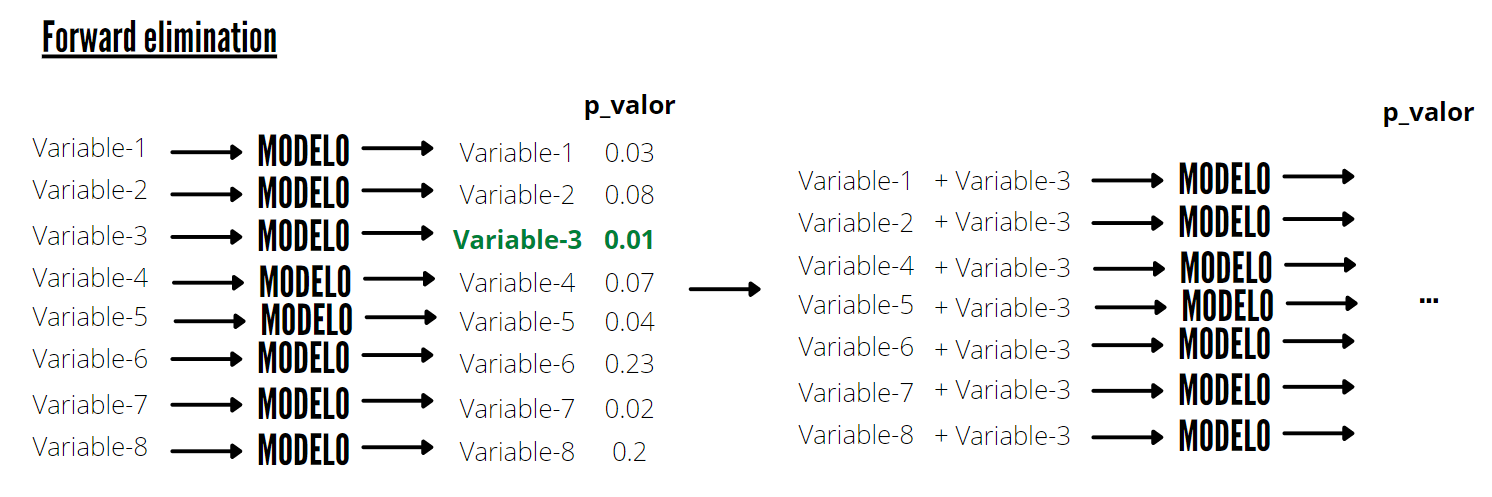

OLS (Ordinary Least Squares) es un algoritmo de regresión lineal, en este método, se selecciona una línea y se calcula la distancia de cada punto a la línea, se eleva al cuadrado y se suman. Se trata de buscar la línea en que la distancia a la misma es mínimo.

In [ ]:
import statsmodels.api as sm

cols = list(X.columns)
X_1 = X[cols]
X_1 = sm.add_constant(X_1)
model = sm.OLS(y,X_1).fit()
model.summary()
# Aparecen resultados estadísticos, pero solo nos interesa el valor p-value

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 14 Nov 2022   Prob (F-statistic):          6.72e-135
Time:                        12:42:57   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
model.pvalues.values[1:]

array([1.08681010e-03, 7.78109688e-04, 7.38288071e-01, 1.92503033e-03,
       4.24564381e-06, 1.97944110e-18, 9.58229309e-01, 6.01349110e-13,
       5.07052902e-06, 1.11163672e-03, 1.30883513e-12, 5.72859167e-04,
       7.77691177e-23])

In [ ]:
# Backward
import statsmodels.api as sm


cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p = []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


### Recursive feature elimination (RFE)

Basicamente lo que hacemos con este modelo es ordenar aquellas columnas que sean mas importantes, es un tipo de **backward elimination** pero sin embargo en lugar de usar el p_value como estimador de que variables deben ser eliminadas se hace mediante un ranking.

Esta ponderación de **que variables son más importantes** que otras puede venir dada por el mismo algoritmo, o por algún método estadístico.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [ ]:
# Hay que seleccionar el algoritmo que usaremos a la hora de elegir las columnas y el número de las mismas
model = LinearRegression()
rfe = RFE(model, 8)

In [ ]:
X_rfe = rfe.fit(X,y)
X_rfe = rfe.transform(X)
model.fit(X_rfe,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Aplicamos el modelo de Regresion Lineal y nos devuelve con un 1 las 7 columnas mas importantes(el numero de columnas importantes que queremos lo ponemos nosotros)

Esto solo nos sirve como *modelo inicial* ya que hemos de averiguar cual es el numero de columnas óptimo para conseguir mejor accuracy.

In [ ]:
print(rfe.support_)
print(rfe.ranking_)

[ True False False  True  True  True False  True  True False  True False
  True]
[1 3 2 1 1 1 6 1 1 4 1 5 1]


*Buscando el número de columnas óptimo*

In [ ]:
from sklearn.model_selection import train_test_split

#no of features
nof_list=np.arange(1,13)
high_score=0
#Variable to store the optimum features
nof=0
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 10
Score with 10 features: 0.663581


Lo que hemos conseguido con este codigo es aplicar un loop para averiguar cuantas columnas debemos de poner, lo haremos provandolos todos del 1 hasta el 13 para poder saber cual nos da una accracy mejor.
A partir de ello, y una vez encontradas el numero de columnas mas óptimas cambiamos el código; en lugar del 7 lo que nos ha dado que es 10; con lo que nos devuelve las 10 mejores

In [ ]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 10)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)
#Fitting the data to model
model.fit(X_rfe,y)
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index

In [ ]:
selected_features_rfe

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO',
       'LSTAT'],
      dtype='object')

## Embedded method
[5]

Comunmente para los *embedded methods* se usan algoritmos de regularización como son Lasso y Ridge.  Estos algorimos en su esencia lo que hacen es penalizar ciertas componentes del modelo para que no hagan *overfitting*. Por lo tanto hacen la selección de variables más importantes **durante el entrenamiento**.

In [ ]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
import matplotlib.pyplot as plt

In [ ]:
reg = LassoCV()
reg.fit(X, y)
coef = pd.Series(reg.coef_, index = X.columns)

In [ ]:
print("Lasso ha escogido " + str(sum(coef != 0)) + " variables y la eliminado otras " +  str(sum(coef == 0)) + " variables")

Lasso ha escogido 10 variables y la eliminado otras 3 variables


Text(0.5, 1.0, 'Importancia de las variables usando el Modelo de Lasso')

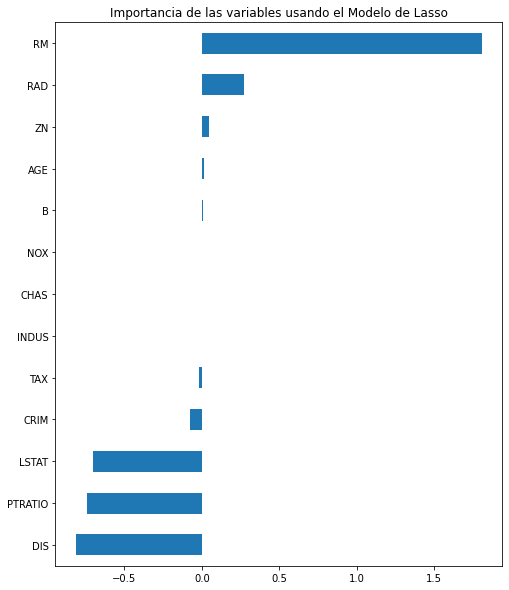

In [ ]:
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Importancia de las variables usando el Modelo de Lasso")

# *Referencias*

[1] https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

[2] https://www.google.com/url?sa=i&url=https%3A%2F%2Fes.wikipedia.org%2Fwiki%2FFunci%25C3%25B3n_mon%25C3%25B3tona&psig=AOvVaw3ZS44KTnrg5ZBshKFEZ-rg&ust=1624210410913000&source=images&cd=vfe&ved=0CAsQjhxqFwoTCLDOkradpPECFQAAAAAdAAAAABAD

[3] https://www.analyticsvidhya.com/blog/2020/10/a-comprehensive-guide-to-feature-selection-using-wrapper-methods-in-python/

[4] https://towardsdatascience.com/backward-elimination-for-feature-selection-in-machine-learning-c6a3a8f8cef4

[5] https://www.analyticsvidhya.com/blog/2016/12/introduction-to-feature-selection-methods-with-an-example-or-how-to-select-the-right-variables/

